In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import torch
%matplotlib inline

# Read image data

In [44]:
image_path = 'SUFRData/image_files/uniform_bg/scaling'

# Torchvision models

In [13]:
import torchvision.models as models

In [16]:
vgg19 = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/ivanjutamulia/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:26<00:00, 21.8MB/s] 


In [19]:
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),                    
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]                  
)])

In [20]:
from PIL import Image

In [121]:
img_3 = Image.open('{}/3.jpg'.format(image_path))
img_4 = Image.open('{}/5.jpg'.format(image_path))

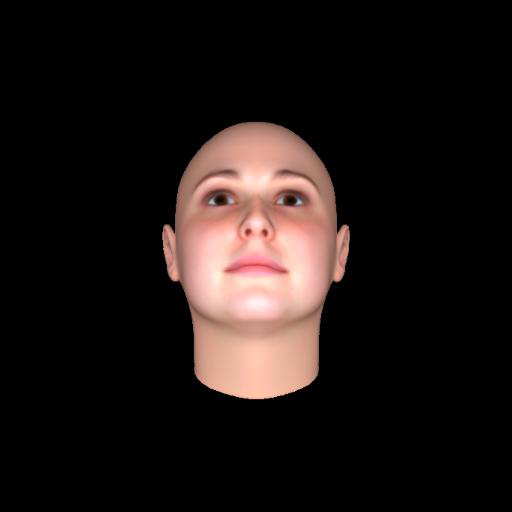

In [122]:
img_3

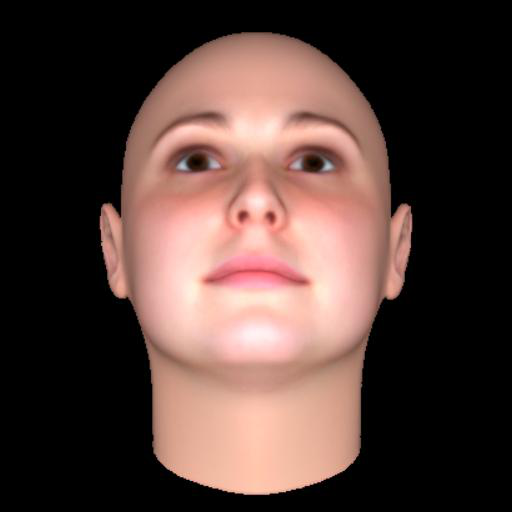

In [123]:
img_4

In [124]:
img_3t = transform(img_3)
batch_3t = torch.unsqueeze(img_3t, 0)
img_4t = transform(img_4)
batch_4t = torch.unsqueeze(img_4t, 0)

In [125]:
vgg19.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [126]:
output_3 = vgg19(batch_3t).detach().numpy()
output_4 = vgg19(batch_4t).detach().numpy()

In [127]:
np.corrcoef(output_3, output_4)

array([[1.        , 0.96229877],
       [0.96229877, 1.        ]])

In [42]:
percentage = torch.nn.functional.softmax(output, dim=1)[0]
sum(percentage)

tensor(1.0000, grad_fn=<AddBackward0>)

In [53]:
### Are correlations from final layer the same as correlations for class prediction vectors? I think yes